# Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
try:
    from cycler import cycler
except:
    pass
# example usage:
# cycler('color', ['r', 'g', 'b', 'y']) + cycler('lw', [1, 2, 3])

plt.rcParams['patch.linewidth'] = 0.5
#plt.rcParams['patch.facecolor'] = '348ABD'  # blue
#plt.rcParams['patch.edgecolor'] = 'EEEEEE'
plt.rcParams['patch.antialiased'] = True

plt.rcParams['font.size'] = 12.0

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['axes.labelcolor'] =  '555555'
#axes.axisbelow: True       # grid/ticks are below elements (eg lines, text)


# want to define these colors:
# E24A33 : red, 348ABD : blue, 988ED5 : purple, 777777 : gray
# FBC15E : yellow, 8EBA42 : green, FFB5B8 : pink

colorlist = ['E24A33', '348ABD', '988ED5', '777777', 'FBC15E', '8EBA42', 'FFB5B8']
#colornames = ['red', 'blue', 'purple', 'gray', 'yellow', 'green', 'pink']
try:
    # newer Matplotlib 

    plt.rcParams['axes.prop_cycle'] = cycler('color', colorlist)
except:
    # older Matplotlib (<1.5 I think)
    plt.rcParams['axes.color_cycle'] = colorlist

#xtick.color: 555555
#xtick.direction: in

#ytick.color: 555555
#ytick.direction: in

plt.rcParams['grid.color'] = 'grey'
plt.rcParams['grid.linestyle'] =  '-'

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.edgecolor'] = 'white'

plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.default'] = 'regular'

For interpreting the coordinates, we need some specific modules to parse them into Python objects etc.

In [6]:
import astropy
import astropy.coordinates as coordinates
import astropy.units as u

import astropy.constants as c
from astropy.table import Table

# 2MASS Extended Source Catalog Redshift Survey

## The data

The data is the 2MASS Extended Source Catalog Redshift 

Available at: https://www.cfa.harvard.edu/~dfabricant/huchra/2mass/

Has 29 fixed width (Fortran format) columns. 
Columns defined in the header of the data file.

We use the Astropy.Tables fixed-width reader.


In [7]:
from astropy.table import Table
import astropy.constants as c
import astropy.units as u
colnames = ('id', 'RAdeg', 'DECdeg', 'l', 'b', 'k_c', 'h_c', 'j_c', 'k_tc',
    'h_tc', 'j_tc', 'e_k', 'e_h', 'e_j', 'e_kt', 'e_ht', 'e_jt', 'e_bv', 
    'r_iso', 'r_ext', 'b/a', 'flgs', 'type', 'ts', 'v', 'ev', 'vc', 
    'vsrc', 'CAT_ID')
colstarts = (0, 16, 26, 36, 46, 56, 63, 70, 77, 84, 91, 98, 104, 110, 
             116, 122, 128, 134, 140, 146, 152, 158, 163, 169, 172, 
             179, 183, 185, 205)
gals = Table.read('data/2mrs_v240/catalog/2mrs_1175_done.dat',
            format='ascii.fixed_width_no_header',
            names=colnames,
            col_starts=colstarts,
             )

In [8]:
gals

id,RAdeg,DECdeg,l,b,k_c,h_c,j_c,k_tc,h_tc,j_tc,e_k,e_h,e_j,e_kt,e_ht,e_jt,e_bv,r_iso,r_ext,b/a,flgs,type,ts,v,ev,vc,vsrc,CAT_ID
str16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,str5,str2,int64,int64,str1,str19,str28
00424433+4116074,10.68471,41.26875,121.1743,-21.57319,0.797,0.929,1.552,0.743,0.881,1.497,0.016,0.016,0.015,0.017,0.017,0.016,0.683,3.208,3.491,0.473,Z111,3A2s,ZC,-300,4,N,1991RC3.9.C...0000d,MESSIER_031
00473313-2517196,11.88806,-25.2888,97.36301,-87.96452,3.815,4.132,4.858,3.765,4.077,4.798,0.016,0.015,0.015,0.017,0.016,0.016,0.019,2.799,2.965,0.264,Z111,5X_s,ZC,243,2,N,2004AJ....128...16K,NGC_0253
09553318+6903549,148.88826,69.06526,142.0919,40.90022,3.898,4.131,4.784,3.803,4.043,4.69,0.016,0.016,0.015,0.018,0.018,0.016,0.08,2.688,2.878,0.517,Z111,2A2s,ZC,-34,4,N,1991RC3.9.C...0000d,MESSIER_081
13252775-4301073,201.36565,-43.01871,309.51639,19.41761,3.948,4.244,4.931,3.901,4.203,4.876,0.015,0.016,0.015,0.016,0.017,0.016,0.115,2.445,2.613,0.957,Z111,-2__P,ZC,547,5,N,1978PASP...90..237G,NGC_5128
13052727-4928044,196.36366,-49.4679,305.27151,13.34017,4.471,4.79,5.508,4.421,4.735,5.444,0.016,0.016,0.015,0.017,0.017,0.016,0.176,2.627,2.772,0.308,Z111,6B_s,ZC,563,3,N,2004AJ....128...16K,NGC_4945
01335090+3039357,23.4621,30.65994,133.61024,-31.33081,4.477,4.697,5.346,4.087,4.329,5.003,0.02,0.018,0.017,0.044,0.038,0.029,0.041,2.699,3.032,0.792,Z111,5A4s,ZC,-179,3,N,1991RC3.9.C...0000d,MESSIER_033
09555243+6940469,148.96846,69.6797,141.40953,40.5671,4.636,5.003,5.744,4.61,4.973,5.704,0.015,0.015,0.015,0.015,0.015,0.015,0.156,2.357,2.542,0.396,Z111,0,ZC,203,4,N,1991RC3.9.C...0000d,MESSIER_082
03464851+6805459,56.70214,68.09611,138.17259,10.57999,4.682,4.952,5.494,4.362,4.682,5.169,0.02,0.019,0.018,0.043,0.04,0.033,0.558,2.571,2.876,0.858,Z111,6X2T,ZC,31,3,N,1999PASP..111..438F,IC_0342
13370091-2951567,204.25383,-29.86576,314.58353,31.97269,4.721,4.951,5.594,4.595,4.832,5.48,0.017,0.016,0.016,0.025,0.019,0.018,0.067,2.495,2.709,0.825,Z111,5X2s,ZC,513,2,N,2004AJ....128...16K,MESSIER_083


In [9]:
gals[:100].show_in_browser()

One of the convenient things with Astropy Tables is that each column can have a unit. It is possible to give this at read-time, but we set it here.

In [10]:
gals['RAdeg'].unit = u.deg
gals['DECdeg'].unit = u.deg
gals['l'].unit = u.deg
gals['b'].unit = u.deg
gals['v'].unit = u.km/u.s

In [11]:
gals['RAdeg'].unit

Unit("deg")

Furthermore, we can load the coordinates into Astropy.coordinates SkyCoord object. With it we can access the coordinates in different systems etc.

In [12]:
coordarr = coordinates.SkyCoord(gals['RAdeg'].quantity, gals['DECdeg'].quantity, frame='fk5', equinox='J2000')
gals['coord'] = coordarr

We can also define the distance to the galaxies, we just tell it that it is redshift distance that we have.

In [13]:
zs = ((gals['v'] / c.c).decompose())
dist = coordinates.Distance(z=zs, allow_negative=True)
gals['dist'] = dist

## Plot : All sky

With the catalog we can plot the sky. This is simply the Mollweide projection.

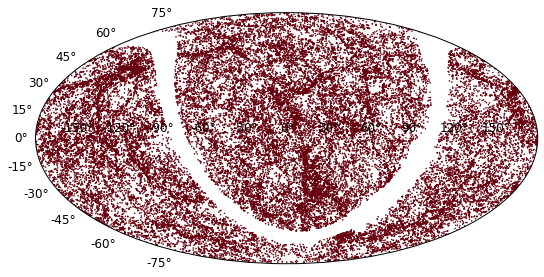

In [15]:
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(gals['coord'].ra.radian-np.pi, gals['coord'].dec.radian, 
           color=plt.cm.Reds(gals['dist']),
           s=4, marker='.', zorder=-1);

### Exercise : 

Improve the plot:
1. Change the color scheme and transparency (alpha)
2. Change the axis labels
3. plot a different parameter

## Cartesian coordinates

With the coordinates object and a distance, we can convert the RA, Dec and distance into cartesian coordinates in Mpc.

In [16]:
coords_xyz = coordinates.SkyCoord(ra=gals['coord'].ra, 
                                  dec=gals['coord'].dec, 
                                  distance=gals['dist'].quantity, frame='fk5', equinox='J2000')

 We can store the X,Y,Z coordinates now into the table

In [17]:
gals['X'] = coords_xyz.cartesian.x
gals['Y'] = coords_xyz.cartesian.y
gals['Z'] = coords_xyz.cartesian.z

In [18]:
gals['X'][:5]

-3.19393602411
3.10353032104
0.150029124455
-5.38050269402
-5.07177661034


## Plot: 2D

The catalog can now easily be drawn, as a whole in X,Y and Z space.

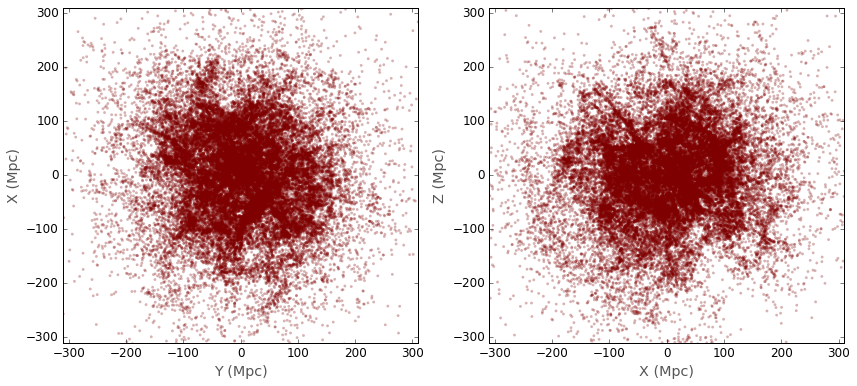

In [19]:
fig,ax = plt.subplots(1,2, figsize=(14,6))

ax1= plt.subplot(121)
ax1.scatter(gals['Y'], -1*gals['X'], 
            s=8, alpha=0.3, 
            color=plt.cm.OrRd(10**(gals['k_c'])), 
            edgecolor='None')
ax1.set_xlabel('Y (Mpc)')
ax1.set_ylabel('X (Mpc)')
ax1.set_xlim(-310,310)
ax1.set_ylim(-310,310)

#plt.figure(figsize=(7,6))
ax2 = plt.subplot(122)
ax2.scatter(-1*gals['X'],gals['Z'], 
            s=8, alpha=0.3, 
            color=plt.cm.OrRd(10**(gals['k_c']) ), 
            edgecolor='None')
ax2.set_xlabel('X (Mpc)')
ax2.set_ylabel('Z (Mpc)')
ax2.set_xlim(-310,310)
ax2.set_ylim(-310,310);

This is very messy, so we need to think of how to display our data better.

### Exercise

Make a third suplot of Y vs. Z

Have each subplot show points in different colors (depending on K magnitude)

Change the axis labels

## Plot: 2D - Filtering

One way of doing this is to filter the data, to only look at certain objects, or certain coordinates for example.

In [20]:
decmin = 15
decmax = 30
ramin = 90
ramax = 295
czmin = 0
czmax = 12500
selection_dec = (gals['coord'].dec.deg>decmin) * (gals['coord'].dec.deg<decmax)
selection_ra = (gals['coord'].ra.deg>ramin) * (gals['coord'].ra.deg<ramax)
selection_czs = (gals['v']>czmin) * (gals['v']<=czmax)
selection_czs_pos = (gals['v']>czmin)
selection = selection_dec * selection_ra * selection_czs

Selection is a Boolean array, that will just pick out the values with True.

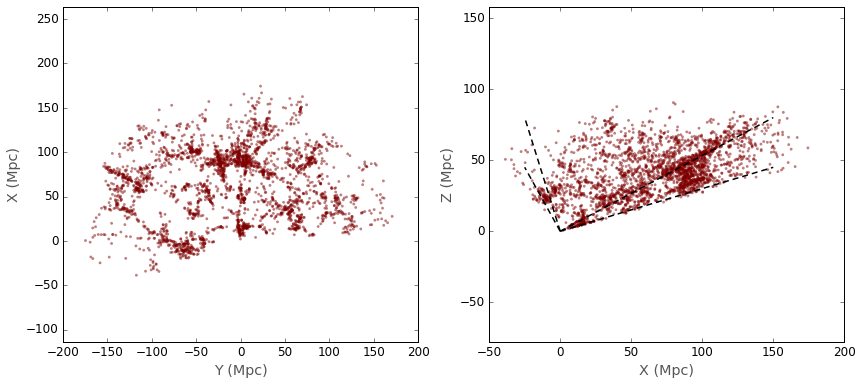

In [21]:
fig,ax = plt.subplots(1,2, figsize=(14,6))

ax1= plt.subplot(121)
ax1.scatter(gals['Y'][selection], -1*gals['X'][selection], 
            s=8, alpha=0.5, color=plt.cm.OrRd(10**(gals['k_c'][selection])), edgecolor='None')
ax1.set_xlabel('Y (Mpc)'); ax1.set_ylabel('X (Mpc)')
ax1.axis('equal');

#plt.figure(figsize=(7,6))
ax2 = plt.subplot(122)
ax2.scatter(-1*gals['X'][selection],gals['Z'][selection], 
            s=8, alpha=0.5, color=plt.cm.OrRd(10**(gals['k_c'][selection]) ), edgecolor='None')
lstyle = dict(lw=1.5, color='k', dashes=(6,4))
ax2.plot([0,150], [0,80], **lstyle)
ax2.plot([0,150], [0,45], **lstyle)
ax2.plot([0,-25], [0,80], **lstyle)
ax2.plot([0,-25], [0,45], **lstyle)
ax2.set_xlabel('X (Mpc)'); ax2.set_ylabel('Z (Mpc)')
ax2.axis('equal');

### Exercise : 


Generate and plot another slice of the data

i.e. filter on other RA, Dec and redshift velocity (distance)

## Polar plot

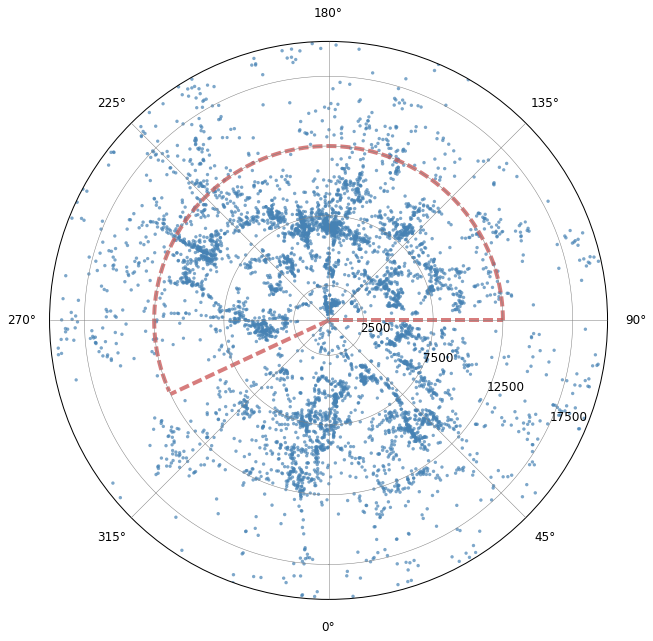

In [22]:
fig = plt.figure( figsize=(10,10))
ax = fig.add_subplot(111, polar=True)
sct = ax.scatter(gals['coord'].ra.radian[selection_dec], gals['v'][selection_dec], 
                     color='SteelBlue',
                     #color=plt.cm.Blues_r((coords_uzc.dec.deg[selection_dec])/100.), 
                     s=gals['k_c'][selection_dec], 
                     edgecolors="none", 
                     alpha=0.7,
                    zorder=0)
ax.set_rlim(0,20000)
ax.set_theta_offset(np.pi/-2)
ax.set_rlabel_position(65)
ax.set_rticks(range(2500,20001,5000));
ax.plot([(ramin*u.deg).to(u.radian).value, (ramin*u.deg).to(u.radian).value], [0,12500], 
        color='IndianRed', alpha=0.8, dashes=(10,4), lw=4)
ax.plot([ramax*np.pi/180., ramax*np.pi/180.], [0,12500],
        color='IndianRed', alpha=0.8, dashes=(10,4), lw=4)
theta = np.arange(ramin, ramax, 1)
ax.plot(theta*np.pi/180., np.ones_like(theta)*12500,
        color='IndianRed', alpha=0.8, dashes=(10,4), lw=4);

### Exercise:

Plot your slice of the data on the polar plot

Change the axis labelling

## Plot: 3D

Can we plot something like this??

<img src="http://i.huffpost.com/gen/2023548/thumbs/o-LANIAKEA-MAP-900.jpg?1">

In [23]:
from mpl_toolkits.mplot3d import Axes3D

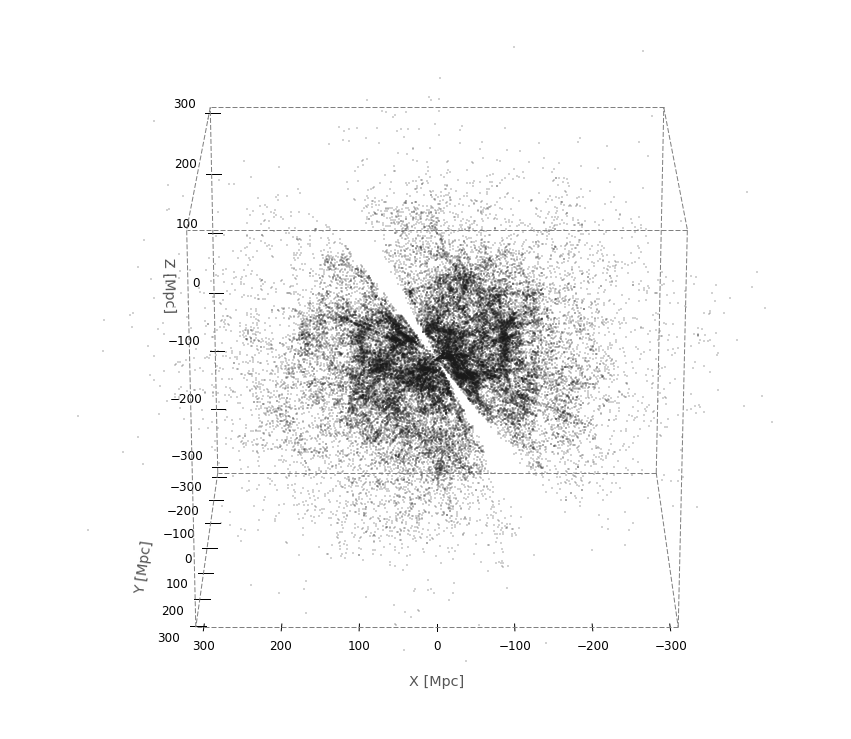

In [26]:
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=20., azim=90)

ax.scatter3D(gals['X'], gals['Y'], 
           zs=gals['Z'], zdir='z', s=1, lw=0, c='0.1', depthshade=False)

# set the axis line colors white to hide
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

ax.grid(False)
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

[t.set_va('center') for t in ax.get_yticklabels()]
[t.set_ha('right') for t in ax.get_yticklabels()]
[t.set_va('center') for t in ax.get_xticklabels()]
[t.set_ha('center') for t in ax.get_xticklabels()]
[t.set_va('bottom') for t in ax.get_zticklabels()]
[t.set_ha('right') for t in ax.get_zticklabels()]

ax.xaxis._axinfo['tick']['inward_factor'] = 0.1
ax.xaxis._axinfo['tick']['outward_factor'] = 0.4
ax.yaxis._axinfo['tick']['inward_factor'] = 0.1
ax.yaxis._axinfo['tick']['outward_factor'] = 0.3
ax.zaxis._axinfo['tick']['inward_factor'] = 0.1
ax.zaxis._axinfo['tick']['outward_factor'] = 0.3



#draw cube
r = [-310, 310]
from itertools import combinations, product
for s, e in combinations(np.array(list(product(r,r,r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s,e), color="0.5",dashes=(5,2))
ax.set_xlim3d(-300, 300)
ax.set_ylim3d(-300, 300)
ax.set_zlim3d(-300, 300)

ax.set_xlabel('\n\nX [Mpc]')
ax.set_ylabel('Y [Mpc]\n\n\n\n')
ax.set_zlabel('\n\nZ [Mpc]');

### Exercise: 

Run this script

Change the view_init arguments

Change the cube limits

Is this a good way to represent this data set?

# Map of the Milky Way

Bessel VLA survey - http://bessel.vlbi-astrometry.org/parallax


** Format of input file ** 
|name | l |	b | Prlx | err | $\mu_\alpha$ cos ($\delta$) |err| $\mu_\delta$ | err | v_LSR | err  | Freq | Telescope | Ref | 
|--|--|	-- | -- | -- | -- | -- | -- | --| --| --| -- | -- | 
| [str] | [deg] | [deg] | [mas] | +/- | [mas/yr] | +/- | [mas/yr] | +/- | [km/s] | +/- | [GHz] | [str] | [str] | 
| G105.41+09.87 | 105.41 | 9.87 | 1.129 | 0.063 | -0.21 | 2.38 | -5.49 | 2.38 | -10.0 | 5.0 | 22.2 | VLBA | 2013ApJ...769...15X |

## Read the data

In [27]:
bessel = pd.read_table('data/bessel.tab',  
                   delim_whitespace=True,
                   names=['name', 'l', 'b', 'prlx', 'prlxerr', 'mua', 'muaerr', 
                          'mud', 'muderr', 'vlsr', 'vlsrerr', 'freq', 'telescope', 'ref'],
                     )

In [28]:
bessel.head()

,name,l,b,prlx,prlxerr,mua,muaerr,mud,muderr,vlsr,vlsrerr,freq,telescope,ref
0,Sgr-B2M,0.67,-0.04,0.130,0.012,-1.23,0.04,-3.84,0.11,61.0,5.0,22.2,VLBA,2009ApJ...705.1548R
1,Sgr-B2N,0.68,-0.03,0.128,0.015,-0.32,0.05,-4.69,0.11,64.0,5.0,22.2,VLBA,2009ApJ...705.1548R
2,G009.62+00.19,9.62,0.20,0.194,0.023,-0.58,0.05,-2.49,0.27,5.0,3.1,12.2,VLBA,2009ApJ...706..464S
3,G010.47+00.02,10.47,0.02,0.117,0.008,-3.86,0.02,-6.40,0.08,68.9,4.5,22.2,VLBA,2014ApJ...781..108S
4,G010.62-00.38,10.62,-0.38,0.202,0.019,-0.37,0.08,-0.60,0.06,-3.0,2.7,22.2,VLBA,2014ApJ...781..108S


## Convert to Astropy Table

In [29]:
bessel = Table(data=bessel.as_matrix(),                    
    names=['name', 'l', 'b', 'prlx', 'prlxerr', 'mua', 'muaerr', 
                          'mud', 'muderr', 'vlsr', 'vlsrerr', 'freq', 'telescope', 'ref'],
    dtype=[str, float, float, float, float, float, float, 
                          float, float,float, float, str, str, str],
     )

In [30]:
bessel[:5]

name,l,b,prlx,prlxerr,mua,muaerr,mud,muderr,vlsr,vlsrerr,freq,telescope,ref
str15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str7,str4,str19
Sgr-B2M,0.67,-0.04,0.13,0.012,-1.23,0.04,-3.84,0.11,61.0,5.0,22.2,VLBA,2009ApJ...705.1548R
Sgr-B2N,0.68,-0.03,0.128,0.015,-0.32,0.05,-4.69,0.11,64.0,5.0,22.2,VLBA,2009ApJ...705.1548R
G009.62+00.19,9.62,0.2,0.194,0.023,-0.58,0.05,-2.49,0.27,5.0,3.1,12.2,VLBA,2009ApJ...706..464S
G010.47+00.02,10.47,0.02,0.117,0.008,-3.86,0.02,-6.4,0.08,68.9,4.5,22.2,VLBA,2014ApJ...781..108S
G010.62-00.38,10.62,-0.38,0.202,0.019,-0.37,0.08,-0.6,0.06,-3.0,2.7,22.2,VLBA,2014ApJ...781..108S


In [31]:
bessel['l'].unit = u.deg
bessel['b'].unit = u.deg
bessel['prlx'].unit = u.mas
bessel['prlxerr'].unit = u.mas
bessel['mua'].unit = u.mas/u.year
bessel['muaerr'].unit = u.mas/u.year
bessel['mud'].unit = u.mas/u.year
bessel['muderr'].unit = u.mas/u.year
bessel['vlsr'].unit = u.km/u.s
bessel['vlsrerr'].unit = u.km/u.s
bessel['freq'].unit = u.GHz

In [32]:
bessel['mud'].unit

Unit("mas / yr")

In [33]:
bessel['l'][:5]

0.67
0.68
9.62
10.47
10.62


## Plot the data

In [34]:
distances = 1./bessel['prlx'].quantity.to(u.arcsec).value * 1e-3

In [35]:
from scipy.misc import imread

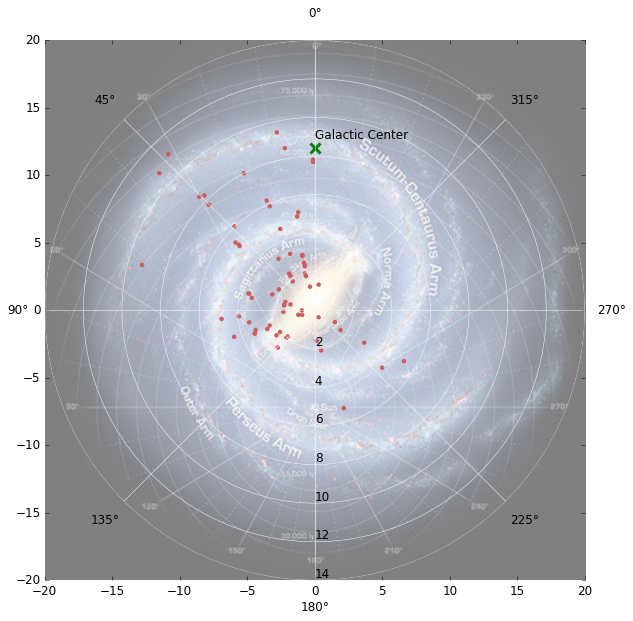

In [37]:
fig = plt.figure( figsize=(10,10))
rect1 = [0.15, 0.15, 0.75, 0.75]
ax_cartesian  = fig.add_axes(rect1, frameon=False)
#ax_cartesian.set_aspect('equal')
img = imread("data/MilkyWay.jpg")
ax_cartesian.imshow(img, zorder=0, extent=[-20, 20, -20, 20], alpha=0.5)


#ax = fig.add_subplot(111, polar=True, axis_bgcolor='white')
rect2 = [0.15, 0.15, 0.75, 0.75]
ax = fig.add_axes(rect2, polar=True, frameon=False)
sct = ax.scatter(bessel['l'].quantity.to(u.rad), distances, 
                     color='IndianRed',
                     #color=plt.cm.RdBu((coords_uzc.dec.deg[selection])/100.), 
                     #s=uzcat['Zmag'][selection_dec*selection_czs], 
                     edgecolors="none",
                    zorder=0)
gc = ax.plot(0,8.4, 'x', ms=10, mew=3, c='Green')
ax.text(0,8.9, 'Galactic Center')
ax.set_rlim(0,10)
ax.set_theta_offset(np.pi/2)
#ax.set_theta_offset(-np.pi/2)
ax.set_rlabel_position(180)
_ = ax.set_rticks(range(2,16,2));
ax.grid(color='0.96')
#ax.plot([(ramin*u.deg).to(u.radian).value, (ramin*u.deg).to(u.radian).value], [0,12500], 
#        color='IndianRed', alpha=0.8, dashes=(10,4))
#ax.plot([ramax*np.pi/180., ramax*np.pi/180.], [0,12500],
#        color='IndianRed', alpha=0.8, dashes=(10,4))
#theta = np.arange(ramin, ramax, 1)
#ax.plot(theta*np.pi/180., np.ones_like(theta)*12500,
#        color='IndianRed', alpha=0.8, dashes=(10,4));.s

### Exercise (advanced)

Shift and scale the data coordinates so that the plot is aligned with the background.

Bessel survey results... NOT THE SAME!!!


<img src="http://bessel.vlbi-astrometry.org/images/BeSSeL_sources.jpg">

### Optional exercise - Plotting spiralarms with Gammapy

Gammapy is ...

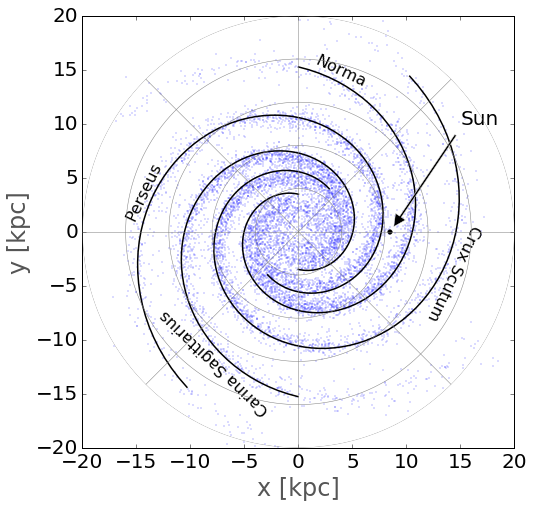

In [38]:
from scipy.misc import imread
import scipy.ndimage as ndimage

from astropy.units import Quantity
from gammapy.astro.population import simulate


catalog = simulate.make_base_catalog_galactic(n_sources=1E4, 
                                              rad_dis='YK04', 
                                              vel_dis='H05', 
                                              max_age=Quantity(1E6, 'yr'))

from gammapy.astro.population import FaucherSpiral
from gammapy.utils.coordinates import polar, cartesian

spiral = FaucherSpiral()

textsize = 20
plt.rcParams['xtick.labelsize']=textsize
plt.rcParams['ytick.labelsize']=textsize
plt.rcParams['font.size']=textsize

fig = plt.figure(figsize=(8,8))
rect = [0.15, 0.15, 0.75, 0.75]
ax_cartesian  = fig.add_axes(rect)
ax_cartesian.set_aspect('equal')
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.axes.get_xaxis().set_ticklabels([])
ax_polar.axes.get_yaxis().set_ticklabels([])

ax_cartesian.scatter(catalog['x'], catalog['y'], s=0.1, color='b')
ax_cartesian.set_xlim(-20, 20)
ax_cartesian.set_ylim(-20, 20)
ax_cartesian.set_xlabel('x [kpc]')
ax_cartesian.set_ylabel('y [kpc]')
ax_cartesian.scatter(8.5, 0, color='k', s=20, marker='o')
ax_cartesian.annotate('Sun', xy=(8.5, 0),  xycoords='data',
                xytext=(15, 10), arrowprops=dict(facecolor='black', shrink=0.05, width=2))

#ax_polar.grid(color='0.96')
#img = imread("data/MilkyWay.jpg")
#img = ndimage.rotate(img, 90)
#ax_cartesian.imshow(img, zorder=0, alpha=1, extent=[-19, 19, -19, 19])

#plt.grid(True)
from astropy.units import Quantity

ind = [95, 90, 80, 80]

for i in range(4):
    theta_0 = spiral.theta_0[i].value
    theta = Quantity(np.linspace(theta_0, theta_0 + 2 * np.pi, 100), 'rad')
    x, y = spiral.xy_position(theta=theta, spiralarm_index=i)
    ax_cartesian.plot(x.value, y.value, color='k', lw=1.5)
    rad, phi = polar(x[ind[i]], y[ind[i]])
    x_pos, y_pos = cartesian(rad + Quantity(1, 'kpc'), phi)
    rotation = theta[ind[i] * 0.97].to('deg').value
    ax_cartesian.text(x_pos.value, y_pos.value, spiral.spiralarms[i],
             ha='center', va='center', rotation=rotation - 90, size=16,
                     color='k')  


# Equatorial and Galactic Coordinates

## Popular packages

    -WCSAxes
    http://wcsaxes.readthedocs.org/

    -PyWCSGrid2
    http://leejjoon.github.io/pywcsgrid2/
    
    - APLpy
    https://aplpy.github.io/
    


### PyWCSGrid2


### APLpy




### WCSAxes
Intended as a replacement for both APLpy, PyWCSGrid2

In [39]:
from astropy.wcs import WCS
from wcsaxes import datasets
from astropy.io import fits

### Read in the data

In [40]:
hdu_msx = fits.open('data/msx.fits')[0]
wcs_msx = WCS(hdu_msx.header)

hdu_l1558_13co = fits.open('data/l1558_13co.fits')[0]
wcs_l1558_13co = WCS(hdu_l1558_13co.header)

hdu_bolocam = fits.open('data/bolocam.fits')[0]
wcs_bolocam = WCS(hdu_bolocam.header)

hdu_rosat = fits.open('data/rosat.fits')[0]
wcs_rosat = WCS(hdu_rosat.header)

hdu_2mass = fits.open('data/2mass_k.fits')[0]
wcs_2mass = WCS(hdu_2mass.header)


invalid alternate code, keyword resembles LONPOLEa but isn't. [astropy.wcs.wcs]
invalid alternate code, keyword resembles LATPOLEa but isn't. [astropy.wcs.wcs]


### MSX data - WCSAxes

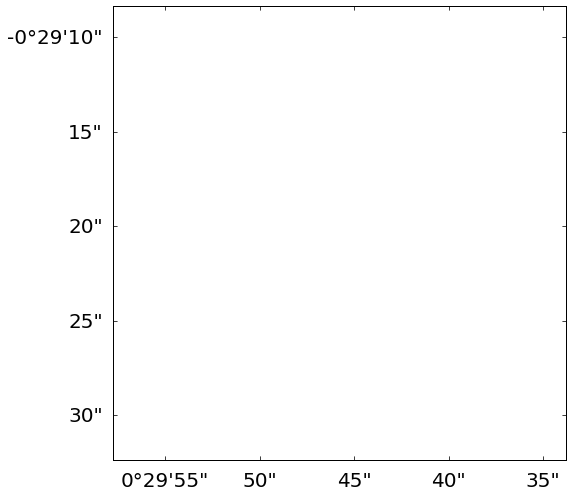

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9], projection=wcs_msx)

In [42]:
plt.hist(hdu.data.flatten(),bins=500)
plt.yscale('log')
plt.xscale('log')

NameError: name 'hdu' is not defined

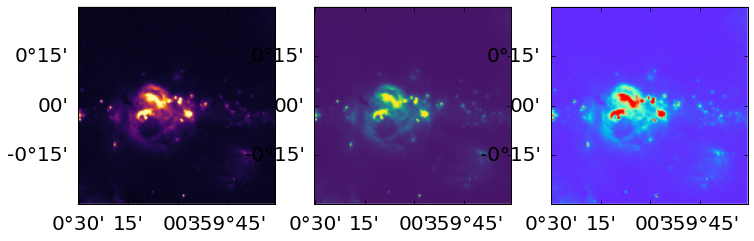

In [43]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,7))
#ax = fig.add_axes([0.15, 0.1, 0.8, 0.8], projection=wcs_msx)
ax1 = fig.add_subplot(131, projection=wcs_msx)
ax1.imshow(hdu_msx.data, vmin=-1e-5, vmax=2.e-4, cmap=plt.cm.inferno,
          origin='lower');



ax2 = fig.add_subplot(132, projection=wcs_msx)
ax2.imshow(hdu_msx.data, vmin=-1e-5, vmax=2.e-4, cmap=plt.cm.viridis,
          origin='lower');



ax3 = fig.add_subplot(133, projection=wcs_msx)
ax3.imshow(hdu_msx.data, vmin=-1e-5, vmax=2.e-4, cmap=plt.cm.rainbow,
          origin='lower');



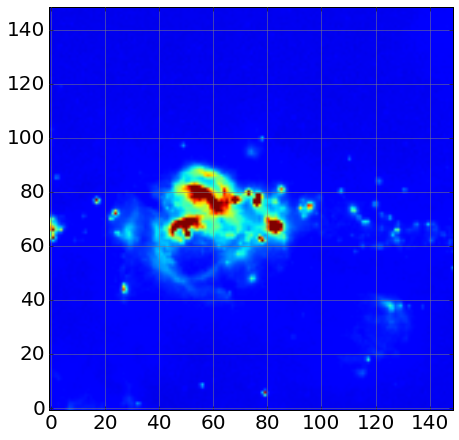

In [44]:


fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0.15, 0.1, 0.8, 0.8])
ax.imshow(hdu_msx.data, vmin=-2.e-5, vmax=2.e-4, cmap=plt.cm.jet,
          origin='lower')
plt.grid()

ValueError: to_rgba: Invalid rgba arg "E"
to_rgb: Invalid rgb arg "E"
could not convert string to float: 'e'

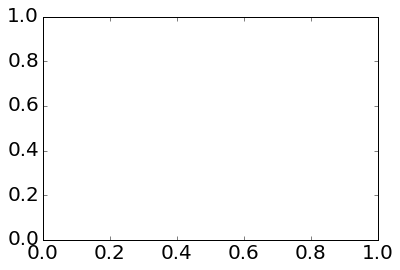

In [45]:
plt.hist(hdu_rosat.data.flatten(),bins=500)
plt.yscale('log')
plt.xscale('log')

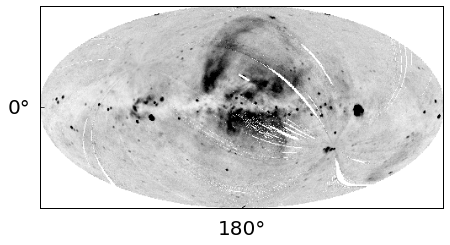

In [46]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0.15, 0.1, 0.8, 0.8], projection=wcs_rosat)
ax.imshow(hdu_rosat.data, vmin=0, vmax=6e2, cmap=plt.cm.gray_r,
          origin='lower');



### Exercise

Take an image of your own or from the astropy examples and try out the coordinate systems




# Other